In [ ]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_dir = '/content/drive/My Drive/FYDP/ellipse_images'

Mounted at /content/drive


In [ ]:
import os

imageFolder = '/content/drive/My Drive/FYDP/462/software/testfolder'
searchstr = os.path.join(imageFolder, '*')
list_of_images = glob.glob(searchstr)

print(list_of_images)

# Plot image
def plot_image(img, title=None):
    plt.figure(figsize=(15,20))
    plt.title(title)
    plt.imshow(img)
    plt.show()
    
# Draw elipsis on image
def draw_ellipse(mask):
    ret, thresh = cv2.threshold(mask, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, 1, 2)
    m3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    has_ellipse = len(contours) > 0
    if has_ellipse:
        cnt = contours[0]
        ellipse = cv2.fitEllipse(cnt)
        cx, cy = np.array(ellipse[0], dtype=np.int)
        m3[cy-2:cy+2,cx-2:cx+2] = (255, 0, 0)
        cv2.ellipse(m3, ellipse, (0, 255, 0), 1)
        print("ellipse", ellipse)
        # print("contours", cnt)
        
    return has_ellipse, m3

# angle = ellipse.angle/180*Pi;
# Center = ellipse.center;
# Sz = ellipse.size;

# g_GOF = 0; 
# double posx, posy;
# for(int i = 0; i < 32; i++)
#     posx = (Coords[i].x - Center.x) * cos(-angle) - (Coords[i].y- Center.y) * sin(-angle);
#     posy = (Coords[i].x - Center.x) * sin(-angle) + (Coords[i].y- Center.y) * cos(-angle);
#     g_GOF += abs( posx/Sz.width*posx/Sz.width + posy/Sz.height*posy/Sz.height - 0.25);

mfiles = list_of_images

files_with_ellipse = 0
for mfile in mfiles:
    mask = cv2.imread(mfile, -1)  # imread(..., -1) returns grayscale images
    has_ellipse, mask_with_ellipse = draw_ellipse(mask)
    if has_ellipse:
        files_with_ellipse = files_with_ellipse+1
        plot_image(mask_with_ellipse, mfile)
        if files_with_ellipse > 2:
            break

['/content/drive/My Drive/FYDP/462/software/testfolder/2.avi', '/content/drive/My Drive/FYDP/462/software/testfolder/P1.jpg', '/content/drive/My Drive/FYDP/462/software/testfolder/P2.jpg', '/content/drive/My Drive/FYDP/462/software/testfolder/P3.jpg', '/content/drive/My Drive/FYDP/462/software/testfolder/P4.jpg', '/content/drive/My Drive/FYDP/462/software/testfolder/P5.jpg', '/content/drive/My Drive/FYDP/462/software/testfolder/PP2.jpg', '/content/drive/My Drive/FYDP/462/software/testfolder/PP1.jpg', '/content/drive/My Drive/FYDP/462/software/testfolder/test.mp4', '/content/drive/My Drive/FYDP/462/software/testfolder/Copy of p2_mask.png', '/content/drive/My Drive/FYDP/462/software/testfolder/Copy of p3_mask.png', '/content/drive/My Drive/FYDP/462/software/testfolder/Copy of p1_mask.png', '/content/drive/My Drive/FYDP/462/software/testfolder/imgFrames', '/content/drive/My Drive/FYDP/462/software/testfolder/test']


error: ignored

# Label Processing

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2 as cv

from google.colab import drive
drive.mount('/content/drive')
label_dir = '/content/drive/My Drive/FYDP/462/software/LabelledImages/label.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open(label_dir) as f:
    string = f.read()

    jsonData = json.loads(string)
    df = pd.DataFrame(jsonData)
    df = df.transpose()

In [ ]:
df.head()

,PupilBoundaryPoints,PupilEllipseAxis,PupilCenter,PupilEllipseAngle,CornealReflectionLocations
nvidia-14_1841_pos.jpg,"[[216, 207], [240, 236], [224, 257], [195, 268...","{'Y': 36, 'X': 30}","{'PupilX': 203, 'PupilY': 236}",75,"{'CornealX': [210, 283, -1, -1, 160], 'Corneal..."
nvidia-04_7664_pos.jpg,"[[435, 226], [465, 245], [472, 272], [461, 296...","{'Y': 41, 'X': 36}","{'PupilX': 434, 'PupilY': 266}",153,"{'CornealX': [-1, 475, 446, 344, 348], 'Cornea..."
P11_3017_pos.jpg,"[[313, 273], [317, 292], [304, 308], [283, 312...","{'Y': 26, 'X': 20}","{'PupilX': 293, 'PupilY': 291}",61,"{'CornealX': [305, 353, 366, 299, 279], 'Corne..."
P9_1925_pos.jpg,"[[268, 347], [286, 358], [290, 374], [284, 394...","{'Y': 30, 'X': 29}","{'PupilX': 259, 'PupilY': 375}",94,"{'CornealX': [-1, 324, 300, 220, 238], 'Cornea..."
nvidia-05_9437_pos.jpg,"[[497, 248], [479, 258], [456, 251], [444, 239...","{'Y': 37, 'X': 25}","{'PupilX': 466, 'PupilY': 226}",137,"{'CornealX': [423, 476, -1, -1, -1], 'CornealY..."


# Example of groundtruth label over input image

[[313, 273], [317, 292], [304, 308], [283, 312], [270, 303], [271, 289], [277, 278], [289, 272], [300, 270], [318, 287], [316, 299], [304, 309], [277, 310]]


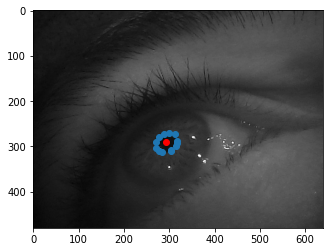

In [ ]:
example_image = '/content/drive/My Drive/FYDP/462/software/LabelledImages/P11_3017_pos.jpg'
example_image_boundary_pts = df.loc['P11_3017_pos.jpg'].PupilBoundaryPoints
print(example_image_boundary_pts)
example_image_center = df.loc['P11_3017_pos.jpg'].PupilCenter

im = plt.imread(example_image)
implot = plt.imshow(im, cmap="gray")

# put a blue dot at (10, 20)
plt.scatter(*zip(*example_image_boundary_pts))

# put a red dot, size 40, at 2 locations:
plt.scatter(example_image_center["PupilX"], example_image_center["PupilY"], c='r')

plt.show()

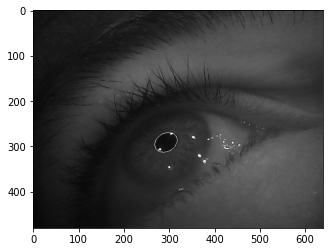

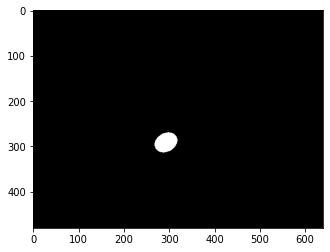

True

In [ ]:
x = np.array(example_image_boundary_pts)[:,0]
y = np.array(example_image_boundary_pts)[:,1]
axes = df.loc['P11_3017_pos.jpg'].PupilEllipseAxis
angle = df.loc['P11_3017_pos.jpg'].PupilEllipseAngle
im = cv2.imread(example_image)
image = cv2.ellipse(im, (int(example_image_center["PupilX"]), int(example_image_center["PupilY"])), (int(axes['X']), int(axes['Y'])), int(angle), 0, 360, (255,255,255), 1)
from google.colab.patches import cv2_imshow
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

mask = np.zeros(im.shape, dtype="uint8")
cv2.ellipse(mask, (int(example_image_center["PupilX"]), int(example_image_center["PupilY"])), (int(axes['X']), int(axes['Y'])), int(angle), 0, 360, (255,255,255), -1)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask)
plt.show()

cv2.imwrite("/content/drive/My Drive/FYDP/462/software/1.bmp", mask)

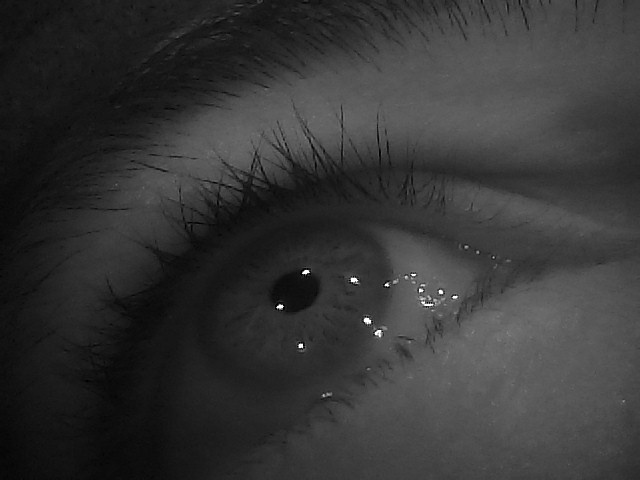

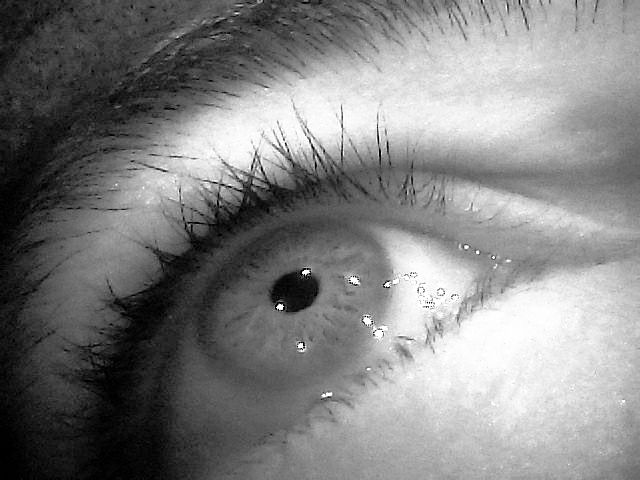

In [ ]:
im1 = cv.imread(example_image, 0)
cv2_imshow(im1)
equ = cv.equalizeHist(im1)
cv2_imshow(equ)

In [ ]:
import glob, os

PATH_TO_TEST_IMAGES_DIR = '/content/drive/My Drive/FYDP/462/software/LabelledImages'
searchstr = os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg')
list_of_images = glob.glob(searchstr)

for image in list_of_images:
  im1 = cv.imread(image, 0)
  equ = cv.equalizeHist(im1)
  os.chdir(PATH_TO_TEST_IMAGES_DIR)
  split_text = image.split(".")
  new_image_path = split_text[0] + "_he."+ split_text[1]
  print(new_image_path)
  cv2.imwrite(new_image_path, equ)

In [ ]:
example_image = '/content/drive/My Drive/FYDP/462/LabelledImages/001841.jpg'
example_image_boundary_pts = df.loc['nvidia-14_1841_pos.jpg'].PupilBoundaryPoints
example_image_center = df.loc['nvidia-14_1841_pos.jpg'].PupilCenter

im = plt.imread(example_image)
implot = plt.imshow(im, cmap="gray")

# put a blue dot at (10, 20)
plt.scatter(*zip(*example_image_boundary_pts))

# put a red dot, size 40, at 2 locations:
plt.scatter(example_image_center["PupilX"], example_image_center["PupilY"], c='r')

plt.show()

In [ ]:
import glob, os

PATH_TO_TEST_IMAGES_DIR = '/content/drive/My Drive/FYDP/462//LabelledImages/'
searchstr = os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg')
list_of_images = glob.glob(searchstr)

In [ ]:
import cv2
vidcap = cv2.VideoCapture('/content/drive/My Drive/FYDP/462/software/testfolder/test.mp4')
success,image = vidcap.read()
count = 0
while success:
    cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    print('Read a new frame: ', success)
    count += 1

**Video to Image Frames Conversion**

In [ ]:
import cv2
vidcap = cv2.VideoCapture('2.avi')
success,image = vidcap.read()
count = 0
while success:
    cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    print('Read a new frame: ', success)
    count += 1

**Filter Images**

In [ ]:
!apt install octave

Reading package lists... Done
Building dependency tree       
Reading state information... Done
octave is already the newest version (4.2.2-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
os.chdir('/content/')

imageFolder = '/content/drive/My Drive/FYDP/462/software/Grouped Image Set'
searchstr = os.path.join(imageFolder, '*')
list_of_images = glob.glob(searchstr)

# print(list_of_images)

!octave -W filterScript.m



In [ ]:
%%writefile filterScript.m

imageFolder = '/content/drive/My Drive/FYDP/462/software/Grouped Image Set';
filteredImageFolder = '/content/drive/My Drive/FYDP/462/software/Filtered Images';

% Get a list of all files in the folder with the desired file name pattern.
filePattern = fullfile(imageFolder, ''); 
theFiles = dir(filePattern);

for k = 1 : length(theFiles)
    baseFileName = theFiles(k).name;
    fullFileName = fullfile(imageFolder, baseFileName);

    try
        RGB = imread(fullFileName);
        isValid = processImage(RGB);
        
        disp(isValid)
    catch
    end
end

Overwriting filterScript.m


**Move Files to GroupedImages Folder**

In [ ]:
import shutil
import os
import glob

file_destination = '/content/drive/My Drive/FYDP/462/software/Grouped Image Set'
file_source = '/content/drive/My Drive/FYDP/462/software/LabelledImages'

searchstr = os.path.join(file_source, '*_he.jpg')
get_files = glob.glob(searchstr)

print(searchstr)
print(get_files)
 
for g in get_files:
  shutil.copy(g, os.path.join(file_destination, os.path.basename(g) + '_lbl'))

/content/drive/My Drive/FYDP/462/software/LabelledImages/*_he.jpg
['/content/drive/My Drive/FYDP/462/software/LabelledImages/P6_3495_neg_he.jpg', '/content/drive/My Drive/FYDP/462/software/LabelledImages/P1_1200_pos_he.jpg', '/content/drive/My Drive/FYDP/462/software/LabelledImages/P4_1829_neg_he.jpg', '/content/drive/My Drive/FYDP/462/software/LabelledImages/P6_4512_neg_he.jpg', '/content/drive/My Drive/FYDP/462/software/LabelledImages/P4_760_pos_he.jpg', '/content/drive/My Drive/FYDP/462/software/LabelledImages/P6_130_neg_he.jpg', '/content/drive/My Drive/FYDP/462/software/LabelledImages/P11_1336_pos_he.jpg', '/content/drive/My Drive/FYDP/462/software/LabelledImages/P8_2050_pos_he.jpg', '/content/drive/My Drive/FYDP/462/software/LabelledImages/P12_1265_pos_he.jpg', '/content/drive/My Drive/FYDP/462/software/LabelledImages/P6_4639_neg_he.jpg', '/content/drive/My Drive/FYDP/462/software/LabelledImages/P11_2804_pos_he.jpg', '/content/drive/My Drive/FYDP/462/software/LabelledImages/P6_14

**Filter Images**

In [ ]:
import cv2 as cv
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.measure import label, regionprops, regionprops_table
from skimage.segmentation import clear_border
from skimage.color import label2rgb
import matplotlib.patches as mpatches

def preprocess(img):
  ret,thresh = cv.threshold(img,30,255,cv.THRESH_BINARY)
  titles = ['Original Image', 'Global Thresholding (v = 127)']
  thresh = np.invert(thresh)
  images = [img, thresh]

  # remove artifacts connected to image border
  cleared = thresh.copy()
  clear_border(cleared)

  # label image regions
  label_im = label(cleared)
  borders = np.logical_xor(thresh, cleared)
  label_im[borders] = -1
  image_label_overlay = label2rgb(label_im, image=img)

  regions = regionprops(label_im)
  # imshow(label_im)

  properties = ['area', 'perimeter', 'convex_area','bbox_area', 'extent', 'bbox',  
                'mean_intensity', 'solidity', 'eccentricity', 
                'orientation', 'major_axis_length', 'minor_axis_length', 'label']

  masks = []
  bbox = []
  list_of_index = []

  ### display overlay image
  # fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
  # ax.imshow(image_label_overlay)

  for num, x in enumerate(regions):
      area = x.area
      solidity = x.solidity
      minorAxisLength = x.minor_axis_length
      majorAxisLength = max(x.major_axis_length, 0.001)
      aspectRatio = min(minorAxisLength, majorAxisLength) / max(minorAxisLength, majorAxisLength)
      circularity = (4*x.area*(math.pi))/(x.perimeter**2)

      if (num!=0 and (area>100) and (solidity>0.5) and (circularity>0.5)
      and (aspectRatio>0.5)):
          masks.append(regions[num].convex_image)
          bbox.append(regions[num].bbox)   
          list_of_index.append(num)
      else:
        continue

      ### draw rectangle around segments
      # minr, minc, maxr, maxc = x.bbox
      # rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
      #                           fill=False, edgecolor='red', linewidth=2)
      # ax.add_patch(rect)
  # plt.show()
  count = len(masks)

  ### print segment data table
  # pd.DataFrame(regionprops_table(label_im, img, 
  #             properties=properties))


  if(count > 0): 
    return True
  else:
    return False

######## Call function on each image to filter
import shutil
import glob

file_source = '/content/drive/My Drive/FYDP/462/software/Grouped Image Set'
file_destination = '/content/drive/My Drive/FYDP/462/software/Final Image Set'

searchstr = os.path.join(file_source, '*')
get_files = glob.glob(searchstr)

for g in get_files:
  ### read image
  print(g)
  image = cv.imread(g,0)
  image = cv.medianBlur(image,5)
  if(preprocess(image)):
    shutil.copy(g, os.path.join(file_destination, os.path.basename(g)))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars


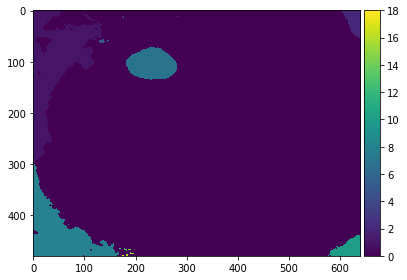

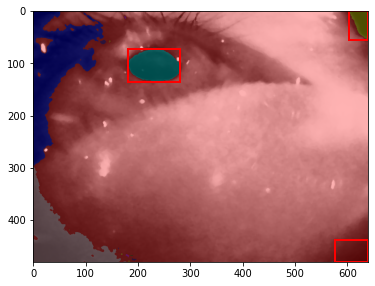

True


In [ ]:
import cv2 as cv
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.measure import label, regionprops, regionprops_table
from skimage.segmentation import clear_border
from skimage.color import label2rgb
import matplotlib.patches as mpatches

def preprocess(img):
  ret,thresh = cv.threshold(img,30,255,cv.THRESH_BINARY)
  titles = ['Original Image', 'Global Thresholding (v = 127)']
  thresh = np.invert(thresh)
  images = [img, thresh]

  # remove artifacts connected to image border
  cleared = thresh.copy()
  clear_border(cleared)

  # label image regions
  label_im = label(cleared)
  borders = np.logical_xor(thresh, cleared)
  label_im[borders] = -1
  image_label_overlay = label2rgb(label_im, image=img)

  regions = regionprops(label_im)
  imshow(label_im)

  properties = ['area', 'perimeter', 'convex_area','bbox_area', 'extent', 'bbox',  
                'mean_intensity', 'solidity', 'eccentricity', 
                'orientation', 'major_axis_length', 'minor_axis_length', 'label']

  masks = []
  bbox = []
  list_of_index = []

  ### display overlay image
  fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
  ax.imshow(image_label_overlay)

  for num, x in enumerate(regions):
      area = x.area
      solidity = x.solidity
      minorAxisLength = x.minor_axis_length
      majorAxisLength = max(x.major_axis_length, 0.001)
      aspectRatio = min(minorAxisLength, majorAxisLength) / max(minorAxisLength, majorAxisLength)
      circularity = (4*x.area*(math.pi))/(x.perimeter**2)

      if (num!=0 and (area>100) and (solidity>0.5) and (circularity>0.5)
      and (aspectRatio>0.5)):
          masks.append(regions[num].convex_image)
          bbox.append(regions[num].bbox)   
          list_of_index.append(num)
      else:
        continue

      ## draw rectangle around segments
      minr, minc, maxr, maxc = x.bbox
      rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
      ax.add_patch(rect)
  plt.show()
  count = len(masks)

  ### print segment data table
  pd.DataFrame(regionprops_table(label_im, img, 
              properties=properties))
  
  if(count > 0): 
    return True
  else:
    return False

######## Call function on each image to filter
import shutil
import glob

file_source = '/content/drive/My Drive/FYDP/462/software/Grouped Image Set/002484_he.jpg_07'

image = cv.imread(file_source,0)
image = cv.medianBlur(image,5)
abc = preprocess(image)

print(abc)





**Labelling**

In [ ]:
import glob, os

PATH_TO_TEST_IMAGES_DIR = '/content/drive/My Drive/FYDP/462/software/Final Image Set'
searchstr = os.path.join(PATH_TO_TEST_IMAGES_DIR, '*')
list_of_images = glob.glob(searchstr)
print(list_of_images)

['/content/drive/My Drive/FYDP/462/software/Final Image Set/P4_6500_pos.jpg', '/content/drive/My Drive/FYDP/462/software/Final Image Set/P4_5540_pos.jpg', '/content/drive/My Drive/FYDP/462/software/Final Image Set/P15_7406_pos.jpg', '/content/drive/My Drive/FYDP/462/software/Final Image Set/P1_5050_pos.jpg', '/content/drive/My Drive/FYDP/462/software/Final Image Set/P13_620_pos.jpg', '/content/drive/My Drive/FYDP/462/software/Final Image Set/P4_3050_pos.jpg', '/content/drive/My Drive/FYDP/462/software/Final Image Set/P13_1460_pos.jpg', '/content/drive/My Drive/FYDP/462/software/Final Image Set/P8_1780_pos.jpg', '/content/drive/My Drive/FYDP/462/software/Final Image Set/P6_4670_pos.jpg', '/content/drive/My Drive/FYDP/462/software/Final Image Set/P13_3200_pos.jpg', '/content/drive/My Drive/FYDP/462/software/Final Image Set/P2_15050_pos.jpg', '/content/drive/My Drive/FYDP/462/software/Final Image Set/P15_3384_pos.jpg', '/content/drive/My Drive/FYDP/462/software/Final Image Set/P9_5736_pos

In [ ]:
print(list_of_images[0].split('/'))
split_back_slash = list_of_images[0].split('/')
print(split_back_slash[len(split_back_slash)-1])
filename = split_back_slash[len(split_back_slash)-1]
print(filename.split('_'))
split_filename = filename.split('_')
print(split_filename[len(split_filename)-1].isnumeric())

name = ''
for i in range(0, len(split_filename)-1):
  if i == len(split_filename)-2:
    name += split_filename[i]
  else:
    name += split_filename[i] + '_'
print(name) 


print(list_of_images[1000])
split_back_slash = list_of_images[1000].split('/')
print(split_back_slash[len(split_back_slash)-1])
filename = split_back_slash[len(split_back_slash)-1]
print(filename.split('_'))
split_filename = filename.split('_')
print(split_filename[len(split_filename)-1] == 'lbl')
name = 'nvidia-'+ split_filename[len(split_filename)-1] + '_' + split_filename[0].lstrip('0') + '_pos.jpg' 
print(name)

['', 'content', 'drive', 'My Drive', 'FYDP', '462', 'software', 'Final Image Set', 'P4_6500_pos_he.jpg_lbl']
P4_6500_pos_he.jpg_lbl
['P4', '6500', 'pos', 'he.jpg', 'lbl']
False
P4_6500_pos_he.jpg
/content/drive/My Drive/FYDP/462/software/Final Image Set/P3_2738_pos_he.jpg_lbl
P3_2738_pos_he.jpg_lbl
['P3', '2738', 'pos', 'he.jpg', 'lbl']
True
nvidia-lbl_P3_pos.jpg


In [ ]:
for file in list_of_images:
  split_back_slash = file.split('/')
  filename = split_back_slash[len(split_back_slash)-1]
  split_filename = filename.split('_')
  name = ''

  if split_filename[len(split_filename)-1] == 'lbl':
    for i in range(0, len(split_filename)-2):
      if i == len(split_filename)-3:
        name += split_filename[i]
      else:
        name += split_filename[i] + '_'
    name = name + '.jpg'
  elif split_filename[len(split_filename)-1].isnumeric():
    name = 'nvidia-'+ split_filename[len(split_filename)-1] + '_' + split_filename[0].lstrip('0') + '_pos.jpg' 
  
  if (name in df.index) == False or split_filename[2] == "neg":
    os.remove(file)
  else:
    im = cv2.imread(file) 
    image_center = df.loc[name].PupilCenter
    axes = df.loc[name].PupilEllipseAxis
    angle = df.loc[name].PupilEllipseAngle
    mask = np.zeros(im.shape, dtype="uint8")
    cv2.ellipse(mask, (int(image_center["PupilX"]), int(image_center["PupilY"])), (int(axes['X']), int(axes['Y'])), int(angle), 0, 360, (255,255,255), -1)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    split_name_dot = name.split('.')
    new_path = '/content/drive/My Drive/FYDP/462/software/annotations/' + split_name_dot[0] + '.png'
    cv2.imwrite(new_path, mask)
  

In [ ]:
import os

for file in list_of_images:
  split_back_slash = file.split('/')
  filename = split_back_slash[len(split_back_slash)-1]
  split_filename = filename.split('_')
  name = ''

  if split_filename[len(split_filename)-1] == 'lbl':
    for i in range(0, len(split_filename)-2):
      if i == len(split_filename)-3:
        name += split_filename[i]
      else:
        name += split_filename[i] + '_'
    name = name + '.jpg'
  elif split_filename[len(split_filename)-1].isnumeric():
    name = 'nvidia-'+ split_filename[len(split_filename)-1] + '_' + split_filename[0].lstrip('0') + '_pos.jpg'
  
  os.rename(file, '/content/drive/My Drive/FYDP/462/software/Final Image Set/' + name)

FileNotFoundError: ignored

**Machine Learning**

In [ ]:
import os

input_dir = '/content/drive/My Drive/FYDP/462/software/Final Image Set'
target_dir = '/content/drive/My Drive/FYDP/462/software/annotations'

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 4088
/content/drive/My Drive/FYDP/462/software/Final Image Set/P10_1100_pos.jpg | /content/drive/My Drive/FYDP/462/software/annotations/P10_1100_pos.png
/content/drive/My Drive/FYDP/462/software/Final Image Set/P10_1200_pos.jpg | /content/drive/My Drive/FYDP/462/software/annotations/P10_1200_pos.png
/content/drive/My Drive/FYDP/462/software/Final Image Set/P10_1500_pos.jpg | /content/drive/My Drive/FYDP/462/software/annotations/P10_1500_pos.png
/content/drive/My Drive/FYDP/462/software/Final Image Set/P10_1650_pos.jpg | /content/drive/My Drive/FYDP/462/software/annotations/P10_1650_pos.png
/content/drive/My Drive/FYDP/462/software/Final Image Set/P10_1800_pos.jpg | /content/drive/My Drive/FYDP/462/software/annotations/P10_1800_pos.png
/content/drive/My Drive/FYDP/462/software/Final Image Set/P10_1850_pos.jpg | /content/drive/My Drive/FYDP/462/software/annotations/P10_1850_pos.png
/content/drive/My Drive/FYDP/462/software/Final Image Set/P10_2100_pos.jpg | /content/dr

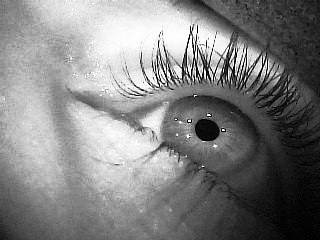

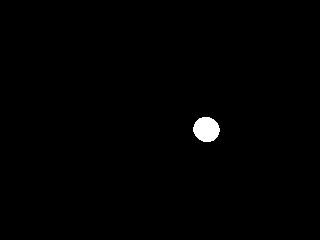

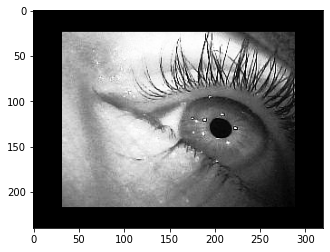

In [ ]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps
from numpy import linalg as LA
from numpy import asarray
import cv2

# Display input image #7
# Perform a sanity check on some random validation samples
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    #plt.imshow(mask)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


display(Image(input_img_paths[9]))
img = plt.imread(input_img_paths[9])
height,width = img.shape[0:2]
arr = np.array([[(width*0.9,height*0.9),(width*0.9,height*0.1),(width*0.1,height*0.1),(width*0.1,height*0.9)]], dtype=np.int32)
ROI = region_of_interest(img,arr)
masked_image = cv2.bitwise_and(img,img, mask=ROI)
plt.imshow(masked_image, cmap='gray')

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)

**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_paths, X_test_paths, y_train_paths, y_test_paths = train_test_split(input_img_paths, target_img_paths, test_size=0.1, random_state=42)

In [ ]:
from tqdm import tqdm
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
import tensorflow as tf
import numpy as np


IMG_WIDTH = 128 # for faster computing on kaggle
IMG_HEIGHT = 128 # for faster computing on kaggle
IMG_CHANNELS = 1
X_train = np.zeros((len(X_train_paths), IMG_HEIGHT, IMG_WIDTH,1), dtype=np.uint8)
y_train = np.zeros((len(y_train_paths), IMG_HEIGHT, IMG_WIDTH,1), dtype=np.bool)

with tf.device('/device:GPU:0'):
  print('Getting and resizing train images and masks ... ')
  for n, path in tqdm(enumerate(X_train_paths), total=len(X_train_paths)):
      img = imread(path)
      height,width = img.shape[0:2]
      arr = np.array([[(width*0.9,height*0.9),(width*0.9,height*0.1),(width*0.1,height*0.1),(width*0.1,height*0.9)]], dtype=np.int32)
      ROI = region_of_interest(img,arr)
      masked_image = cv2.bitwise_and(img,img,mask=ROI)
      masked_image =  np.expand_dims(resize(masked_image, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
      X_train[n] = masked_image
      mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
      mask_ = cv2.imread(y_train_paths[n])
      mask_ = cv2.cvtColor(mask_, cv2.COLOR_BGR2GRAY)
      ROI = region_of_interest(img,arr)
      mask_ = cv2.bitwise_and(mask_,mask_,mask=ROI)
      mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                        preserve_range=True), axis=-1)
      mask = np.maximum(mask, mask_)
      y_train[n] = mask

  # Get and resize test images
  X_test = np.zeros((len(X_test_paths), IMG_HEIGHT, IMG_WIDTH,1), dtype=np.uint8)
  y_test = np.zeros((len(y_test_paths), IMG_HEIGHT, IMG_WIDTH,1), dtype=np.bool)
  # sizes_test = []
  print('Getting and resizing test images ... ')
  for n, path in tqdm(enumerate(X_test_paths), total=len(X_test_paths)):
      img = imread(path)
      img = np.expand_dims(resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
      X_test[n] = img
      mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
      mask_ = cv2.imread(y_test_paths[n])
      mask_ = cv2.cvtColor(mask_, cv2.COLOR_BGR2GRAY)
      mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                        preserve_range=True), axis=-1)
      mask = np.maximum(mask, mask_)
      y_test[n] = mask

  print('Done!')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


Getting and resizing train images and masks ... 


  0%|          | 0/3679 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
100%|██████████| 3679/3679 [26:31<00:00,  2.31it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Getting and resizing test images ... 


  0%|          | 0/409 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
100%|██████████| 409/409 [02:43<00:00,  2.50it/s]

Done!


**Data Augmentation**

In [ ]:
from keras.preprocessing import image

seed = 42
BATCH_SIZE = 64

# Creating the training Image and Mask generator
image_datagen = image.ImageDataGenerator(rescale=1./255, rotation_range=50, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, brightness_range=[0.5,1.5])
mask_datagen = image.ImageDataGenerator(rescale=1./255, rotation_range=50, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, brightness_range=[0.5,1.5])

# Keep the same seed for image and mask generators so they fit together

image_datagen.fit(X_train[:int(X_train.shape[0]*0.9)], augment=True, seed=seed)
mask_datagen.fit(y_train[:int(y_train.shape[0]*0.9)], augment=True, seed=seed)

x=image_datagen.flow(X_train[:int(X_train.shape[0]*0.9)],batch_size=BATCH_SIZE,shuffle=True, seed=seed)
y=mask_datagen.flow(y_train[:int(y_train.shape[0]*0.9)],batch_size=BATCH_SIZE,shuffle=True, seed=seed)



# Creating the validation Image and Mask generator
image_datagen_val = image.ImageDataGenerator()
mask_datagen_val = image.ImageDataGenerator()

image_datagen_val.fit(X_train[int(X_train.shape[0]*0.9):], augment=True, seed=seed)
mask_datagen_val.fit(y_train[int(y_train.shape[0]*0.9):], augment=True, seed=seed)

x_val=image_datagen_val.flow(X_train[int(X_train.shape[0]*0.9):],batch_size=BATCH_SIZE,shuffle=True, seed=seed)
y_val=mask_datagen_val.flow(y_train[int(y_train.shape[0]*0.9):],batch_size=BATCH_SIZE,shuffle=True, seed=seed)

In [ ]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf

# Build U-Net model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy", tf.keras.metrics.MeanIoU(num_classes=2)])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 128, 128, 1)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 16  160         ['lambda_1[0][0]']               
                                )                                                                 
                                                                                            

In [ ]:
#creating a training and validation generator that generate masks and images
train_generator = zip(x, y)
val_generator = zip(x_val, y_val)
earlystopper = EarlyStopping(patience=3, verbose=1)
checkpointer = ModelCheckpoint('/content/drive/My Drive/FYDP/462/software/model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
with tf.device('/device:GPU:0'):
  results = model.fit(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250,
                              epochs=40, callbacks=[earlystopper, checkpointer])

Epoch 1/40
250/250 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.9796 - mean_io_u_12: 0.4966
Epoch 1: val_loss improved from inf to 2.68239, saving model to /content/drive/My Drive/FYDP/462/software/model-dsbowl2018-1.h5
250/250 [==============================] - 96s 376ms/step - loss: 0.0572 - accuracy: 0.9796 - mean_io_u_12: 0.4966 - val_loss: 2.6824 - val_accuracy: 0.9852 - val_mean_io_u_12: 0.4926
Epoch 2/40
250/250 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9873 - mean_io_u_12: 0.4966
Epoch 2: val_loss improved from 2.68239 to 1.56102, saving model to /content/drive/My Drive/FYDP/462/software/model-dsbowl2018-1.h5
250/250 [==============================] - 93s 373ms/step - loss: 0.0176 - accuracy: 0.9873 - mean_io_u_12: 0.4966 - val_loss: 1.5610 - val_accuracy: 0.9853 - val_mean_io_u_12: 0.4926
Epoch 3/40
250/250 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9886 - mean_io_u_12: 0.4966
Epoch 3: val_lo

In [ ]:
# Predict on train, val and test
from keras.models import Model, load_model
import tensorflow as tf
#model = load_model('model-dsbowl2018-1.h5', custom_objects={'mean_iou': tf.keras.metrics.MeanIoU(num_classes=2)})
model.load_weights('model-dsbowl2018-1.h5')
model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=["accuracy", tf.keras.metrics.MeanIoU(num_classes=2)])
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.7).astype(np.uint8)
preds_val_t = (preds_val > 0.7).astype(np.uint8)
preds_test_t = (preds_test > 0.7).astype(np.uint8)

13/13 [==============================] - 1s 55ms/step


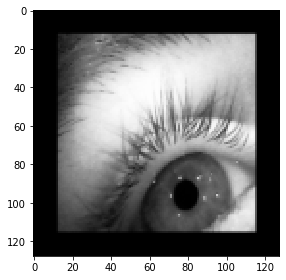

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


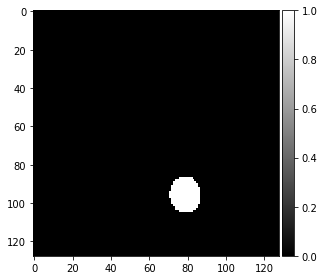

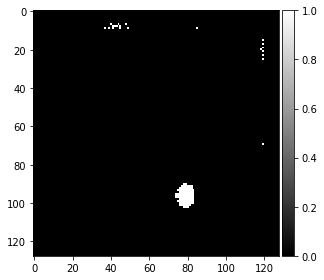

In [ ]:
# Perform a sanity check on some random training samples
import random
import matplotlib.pyplot as plt
ix = random.randint(0, len(preds_train_t))
imshow(np.squeeze(X_train[ix]))
plt.show()
imshow(np.squeeze(y_train[ix].astype(np.uint32)), cmap = "gray")
plt.show()
for i in range(0, np.shape(preds_train_t[ix])[0]):
  for j in range(0, np.shape(preds_train_t[ix])[1])):
    if i*0.9,height*0.9),(width*0.9,height*0.1),(width*0.1,height*0.1),(width*0.1,height*0.9)
imshow(np.squeeze(preds_train_t[ix]), cmap = "gray")
plt.show()

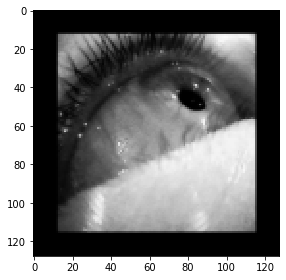

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


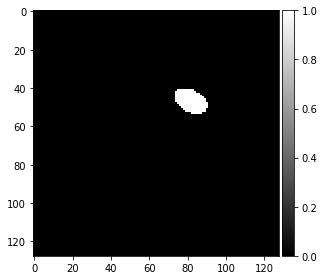

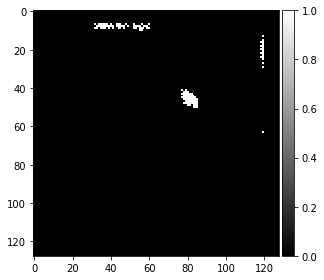

In [ ]:
ix = random.randint(0, len(preds_val_t))
imshow(np.squeeze(X_train[int(X_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix].astype(np.uint32)), cmap = "gray")
plt.show()
imshow(np.squeeze(preds_val_t[ix]), cmap = "gray")
plt.show()

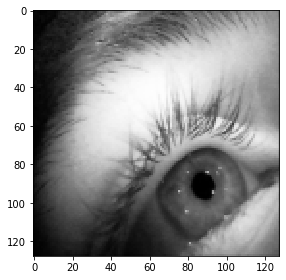

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


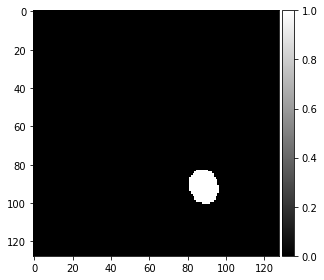

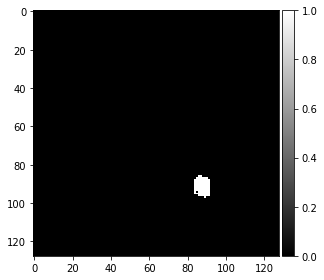

In [ ]:
ix = random.randint(0, len(preds_test_t))
imshow(np.squeeze(X_test[ix]))
plt.show()
imshow(np.squeeze(y_test[ix].astype(np.uint32)), cmap = "gray")
plt.show()
imshow(np.squeeze(preds_test_t[ix]), cmap = "gray")
plt.show()

In [ ]:
# from skimage.transform import resize
# from google.colab.patches import cv2_imshow

# IMG_HEIGHT = 128
# IMG_WIDTH = 128
# IMG_CHANNELS = 1
# def prediction(imagePath):
#     img=cv2.imread(imagePath,0)
#     img = cv2.equalizeHist(img)
#     height, width = np.shape(img)[0:2]
#     img = np.expand_dims(resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
#     x_test= np.zeros((1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
#     #testimg=resize(img,(self.IMG_HEIGHT,self.IMG_WIDTH),mode='constant',preserve_range=True)
#     x_test[0]=img
#     preds_test= model.predict(x_test, verbose=1)
    
#     preds_test_t = (preds_test > 0.4).astype(np.uint8)
#     squeezed_pred = np.squeeze(preds_test_t[0])
#     reshaped_pred = resize(squeezed_pred, (height, width), mode='constant', preserve_range=True)
#     plt.imshow(reshaped_pred, cmap = "gray")
#     plt.show()
#     cv2_imshow(reshaped_pred)
#     cv2.imwrite("mask.png", reshaped_pred)

# prediction('input.png')

# img = cv2.imread('input.png')
# plt.imshow(img, cmap = "gray")
# plt.show()

In [ ]:
history = results.history 
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(acc, '-', label='Training Accuracy')
plt.plot(val_acc, '--', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

In [ ]:
!pip install chainercv

     |████████████████████████████████| 260 kB 11.8 MB/s 
     |████████████████████████████████| 1.0 MB 44.8 MB/s 
  Created wheel for chainercv: filename=chainercv-0.13.1-cp37-cp37m-linux_x86_64.whl size=538363 sha256=2f4fc1540d441ac1c0b874b97a1a4f9c02057fc7e4bffe477e46d8d19c4b9881
  Stored in directory: /root/.cache/pip/wheels/d0/25/65/69b903887d07424c5b971f5676f1151b32dc971df0f710097c
  Created wheel for chainer: filename=chainer-7.8.1-py3-none-any.whl size=967740 sha256=40c8e36a23cf12cd07a45490e76a21e57f35f4013f55a1e39217ccc9708f56c9
  Stored in directory: /root/.cache/pip/wheels/c8/6a/6f/fd563166cc597e5206e375ea074ea836e5db5dd58421215672
Successfully built chainercv chainer


In [ ]:
!pip install 'cupy-cuda111>=7.7.0,<8.0.0'

In [ ]:
import chainercv
from chainercv.evaluations import eval_semantic_segmentation

/usr/local/lib/python3.7/dist-packages/chainer/_environment_check.py:75: UserWarning: 
--------------------------------------------------------------------------------
CuPy (cupy-cuda111) version 9.4.0 may not be compatible with this version of Chainer.
Please consider installing the supported version by running:
  $ pip install 'cupy-cuda111>=7.7.0,<8.0.0'

See the following page for more details:
  https://docs.cupy.dev/en/latest/install.html
--------------------------------------------------------------------------------

  requirement=requirement, help=help))


KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


ValueError: ignored

In [ ]:
hello = preds_test_t[0].transpose(2,0,1).reshape(-3,1)
predicted = []
truth = []
for i in range(0, np.shape(preds_test)[0]):
  predicted.append(preds_test_t[i].transpose(2,0,1).reshape(-3,1))
  truth.append(y_test[i].transpose(2,0,1).reshape(-3,1))

conf = eval_semantic_segmentation(predicted, truth)
print(conf)

{'iou': array([0.99017371, 0.33717425]), 'miou': 0.6636739801001004, 'pixel_accuracy': 0.9902225858133404, 'class_accuracy': array([0.99935291, 0.35241559]), 'mean_class_accuracy': 0.6758842513252843}


In [ ]:
def dice_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(y_true * y_pred, axis=[1,2,3])
  union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
  dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
  return dice

In [ ]:
print(dice_coef(preds_test_t.astype(float), y_test.astype(float)))

tf.Tensor(0.4553600093543196, shape=(), dtype=float64)


In [ ]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(preds_test_t.flatten().astype(float), y_test.flatten().astype(float)))

0.5554679877003231
